
# Jennifer Hightower
## Plant Seeding Classification


### Executive Summary:

In the vast and vital realm of agriculture, the need for modernization has never been more pressing. Despite numerous technological advancements, the agricultural sector continues to rely heavily on manual labor to sort and identify various plants and weeds, a labor-intensive task that consumes time and energy. This trillion-dollar industry is ripe for transformation through the infusion of Artificial Intelligence (AI) and Deep Learning. By harnessing the power of AI, we can significantly reduce the burden of manual labor, revolutionize plant identification, and pave the way for improved crop yields and more sustainable agricultural practices.

### Business Problem Overview:

The agricultural industry faces a fundamental challenge: the arduous task of manually sorting and identifying different plant seedlings. This time-consuming process hampers efficiency and limits the capacity for higher-order decision making in agriculture. To address this challenge, our mission is to leverage cutting-edge AI technology to automate and enhance the plant classification process. Our goal is to build a Convolutional Neural Network (CNN) model capable of classifying plant seedlings into their respective 12 categories. By doing so, we aim to streamline agricultural operations, increase productivity, and contribute to the long-term sustainability of agriculture.

### Solution Approach:

We have collaborated with the esteemed Aarhus University Signal Processing group and the University of Southern Denmark to access a comprehensive dataset containing images of unique plants belonging to 12 different species. This dataset, available as "images.npy" and "Labels.csv," presents an opportunity to develop a powerful CNN model. The model will be trained to recognize and classify plant species from images, automating a task that traditionally relied on manual labor.

### Our approach involves the following key steps:

Careful Problem Analysis: We begin by thoroughly understanding the problem statement and its implications in the agriculture sector.

Data Access: The dataset, including images and corresponding labels, is retrieved from the Olympus platform.

Data Preprocessing: Given the large volume of data, the images have been converted into numpy arrays stored in "images.npy," while labels are organized in "Labels.csv."

Model Development: We will design and build a Convolutional Neural Network (CNN) capable of classifying plant seedlings accurately. The CNN will leverage the power of deep learning to identify plant species from images.

Computational Power: To expedite model training, we recommend using Google Colab with GPU support, ensuring faster execution, especially when dealing with complex CNN architectures.

Our solution approach aims to harness the capabilities of AI and Deep Learning to empower the agricultural industry. By automating plant classification, we anticipate improved efficiency, better crop yields, and a brighter future for sustainable agricultural practices. The fusion of technology and agriculture holds immense promise, and we are at the forefront of this transformative journey.

In [10]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
%matplotlib inline

# Create features and labels
from tensorflow.keras.applications.mobilenet import preprocess_input
import cv2

import warnings
warnings.filterwarnings('ignore')

2023-10-06 13:23:58.662381: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



## Exploratory Data Analysis


In [3]:
import numpy as np
import pandas as pd

np_load_old = np.load

# # modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle = True, **k)

# Load image data
images = np.load('images.npy')

# Load labels
labels = pd.read_csv('Labels.csv')

# Check data dimensions
print("Image Data Shape:", images.shape)
print("Labels Data Head:", labels.head())

Image Data Shape: (4750, 128, 128, 3)
Labels Data Head:                        Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill


In [4]:
labels.head()

Label
0  Small-flowered Cranesbill
1  Small-flowered Cranesbill
2  Small-flowered Cranesbill
3  Small-flowered Cranesbill
4  Small-flowered Cranesbill

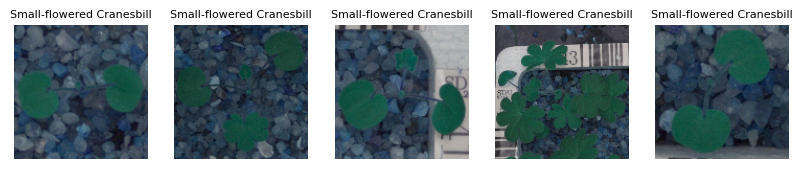

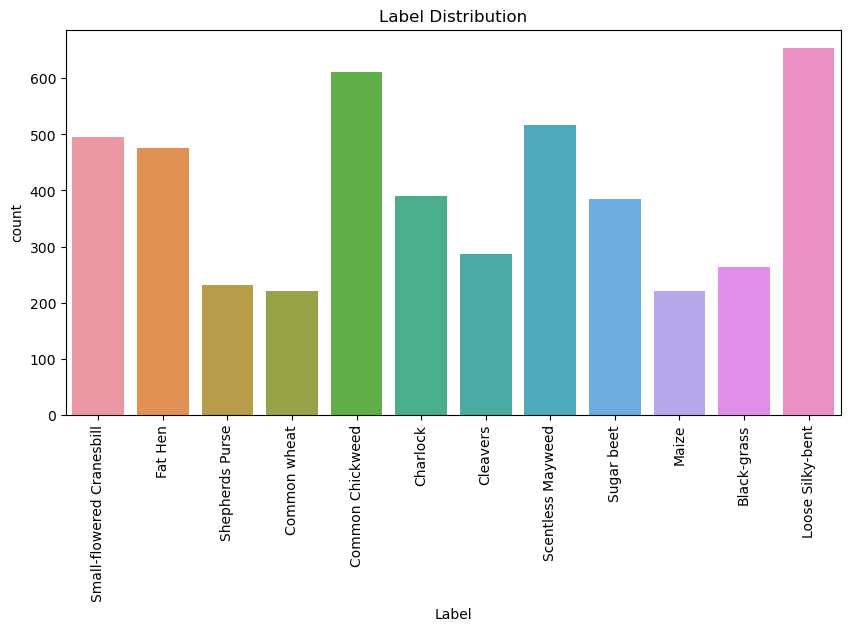

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sample images 
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i])
    plt.title(labels['Label'][i], fontsize=8)  # Adjust the fontsize as needed
    plt.axis('off')

# Visualize label distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=labels, x='Label')
plt.xticks(rotation=90)
plt.title("Label Distribution")
plt.show()


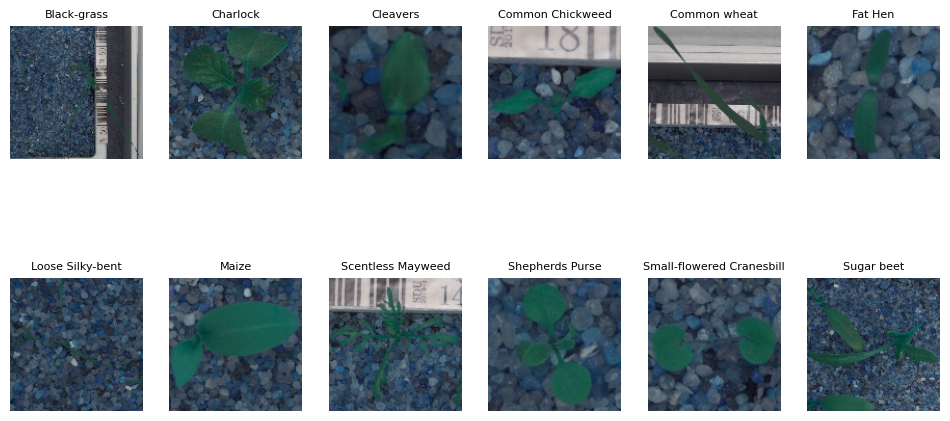

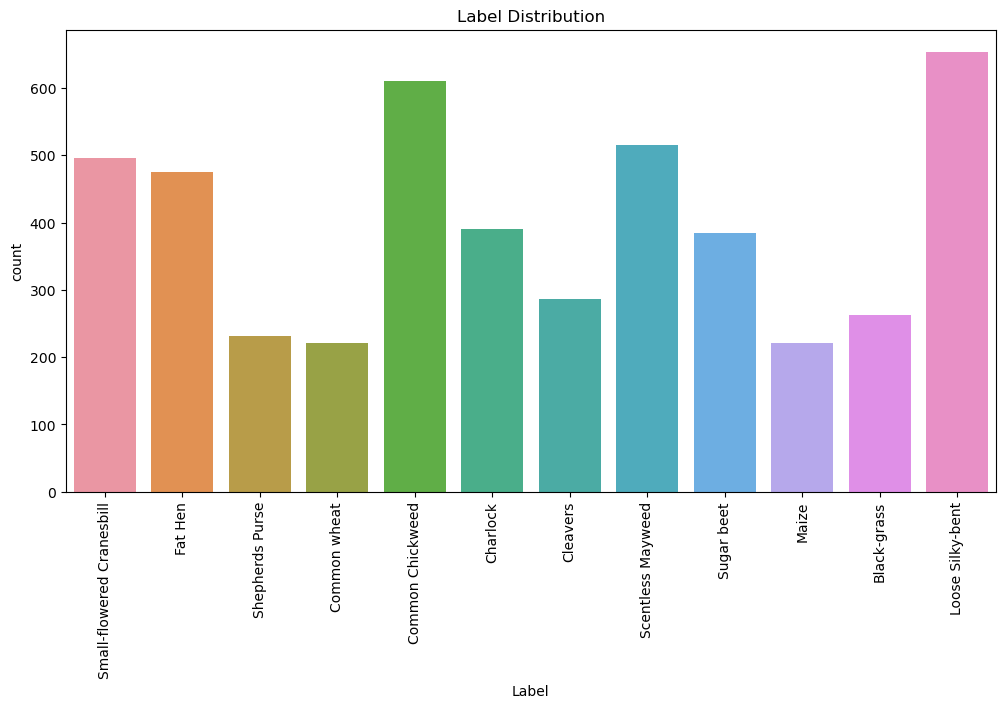

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique category names
category_names = np.unique(labels['Label'])

# Create a dictionary to store the first image for each category
first_images = {category: None for category in category_names}

# Find and store the first image for each category
for category in category_names:
    first_image_index = labels.index[labels['Label'] == category][0]
    first_images[category] = images[first_image_index]

# Visualize one image per category
plt.figure(figsize=(12, 6))
for i, category in enumerate(category_names):
    plt.subplot(2, 6, i + 1)  # Adjust the subplot layout as needed
    plt.imshow(first_images[category], cmap='gray')
    plt.title(category, fontsize=8)
    plt.axis('off')

# Visualize label distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=labels, x='Label')
plt.xticks(rotation=90)
plt.title("Label Distribution")
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

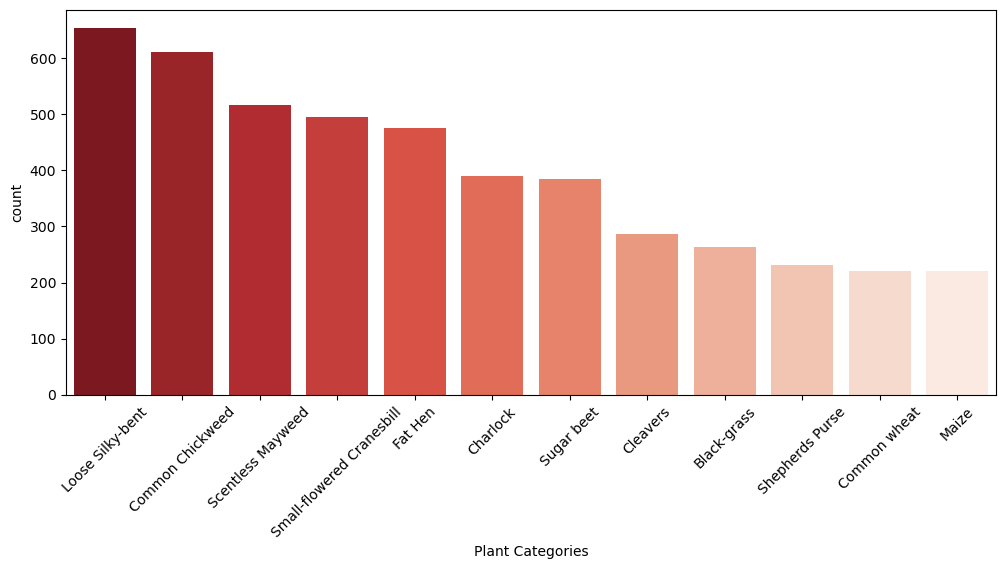

In [84]:
plt.rcParams["figure.figsize"] = (12,5)
sns.countplot(x=labels.iloc[:,-1],order = labels['Label'].value_counts().index, palette='Reds_r')
plt.xlabel('Plant Categories')
plt.xticks(rotation=45)

In [8]:
# Compute image statistics
image_mean = np.mean(images)
image_median = np.median(images)
image_std = np.std(images)

# Label statistics
num_classes = labels['Label'].nunique()
class_counts = labels['Label'].value_counts()

print("Image Mean:", image_mean)
print("Image Median:", image_median)
print("Image Standard Deviation:", image_std)
print("Number of Unique Classes:", num_classes)
print("Class Counts:\n", class_counts)


Image Mean: 70.04363745545504
Image Median: 67.0
Image Standard Deviation: 31.996876308515
Number of Unique Classes: 12
Class Counts:
 Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


In [9]:
# Check for missing values
missing_values = labels.isnull().sum()

# Data augmentation (if needed)
# You can apply techniques like rotation, scaling, and flipping to augment image data.

print("Missing Values:\n", missing_values)


Missing Values:
 Label    0
dtype: int64


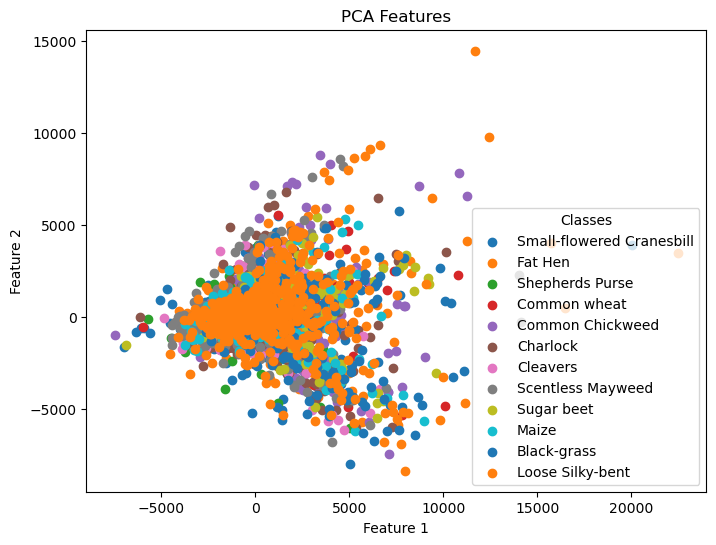

In [16]:
from sklearn.decomposition import PCA

# Apply PCA to image data for feature extraction
pca = PCA(n_components=2)
image_features = pca.fit_transform(images.reshape(images.shape[0], -1))

# Get the category names from the 'species' column
category_names = labels['Label'].unique()

# Create an empty list to store legend handles and labels
legend_handles = []

# Visualize the extracted features with category labels
plt.figure(figsize=(8, 6))
for category in category_names:
    # Filter data points for the current category
    data_points = image_features[labels['Label'] == category]
    
    # Create a scatter plot for the current category
    scatter = plt.scatter(data_points[:, 0], data_points[:, 1], label=category)
    
    # Append the legend handle for the current category
    legend_handles.append(scatter)

# Add legend with handles and labels
plt.legend(handles=legend_handles, title="Classes")
plt.title("PCA Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


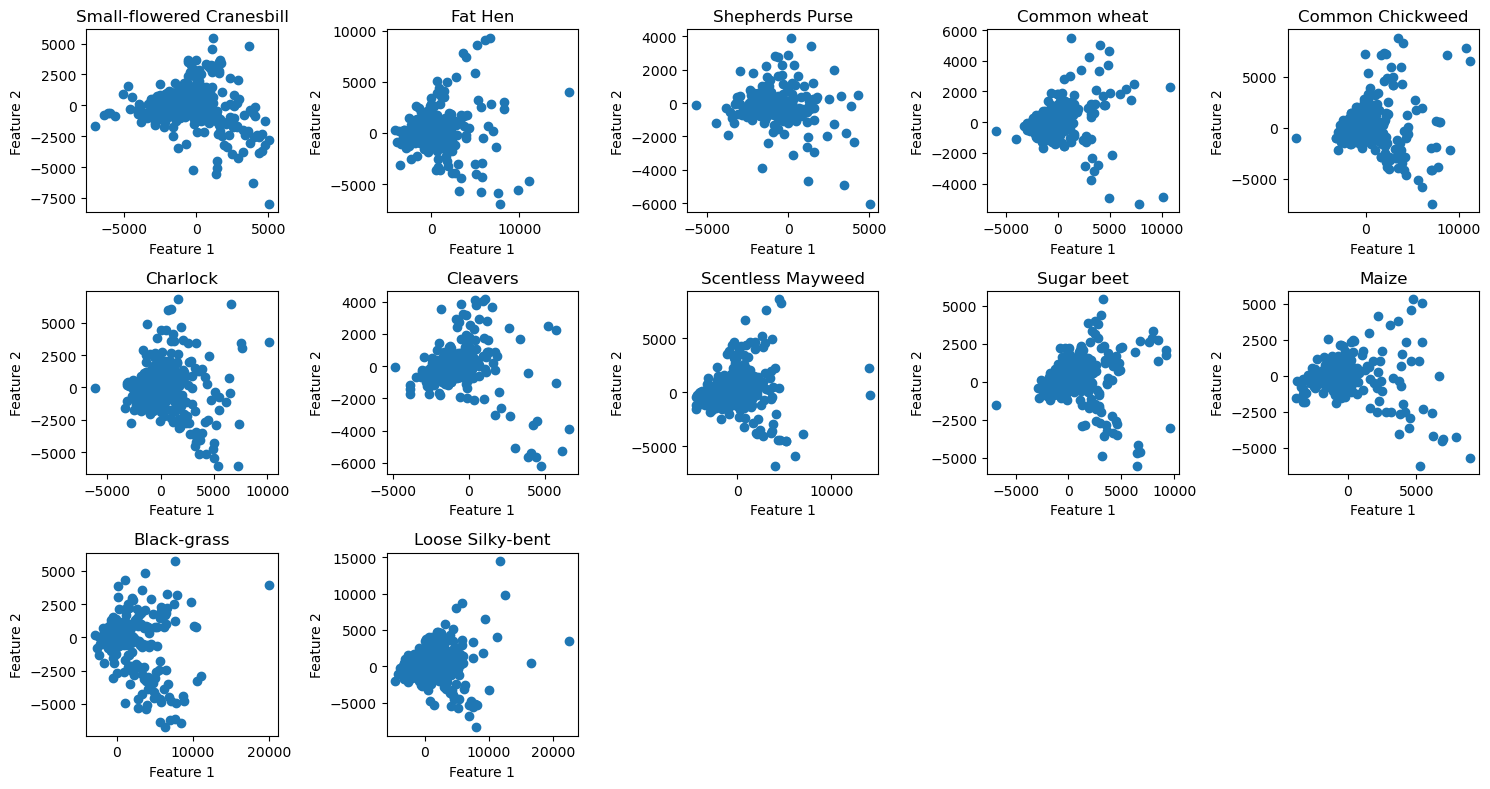

In [14]:
from sklearn.decomposition import PCA

# Apply PCA to image data for feature extraction
pca = PCA(n_components=2)
image_features = pca.fit_transform(images.reshape(images.shape[0], -1))

# Get the category names from the 'species' column
category_names = labels['Label'].unique()

# Create a separate PCA visualization for each category
plt.figure(figsize=(15, 8))

# Determine the number of rows and columns for subplots
num_rows = 3  # Adjust the number of rows as needed
num_cols = len(category_names) // num_rows + 1

for i, category in enumerate(category_names):
    # Filter data points for the current category
    data_points = image_features[labels['Label'] == category]
    
    # Create a scatter plot for the current category
    plt.subplot(num_rows, num_cols, i + 1)
    plt.scatter(data_points[:, 0], data_points[:, 1])
    plt.title(category)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


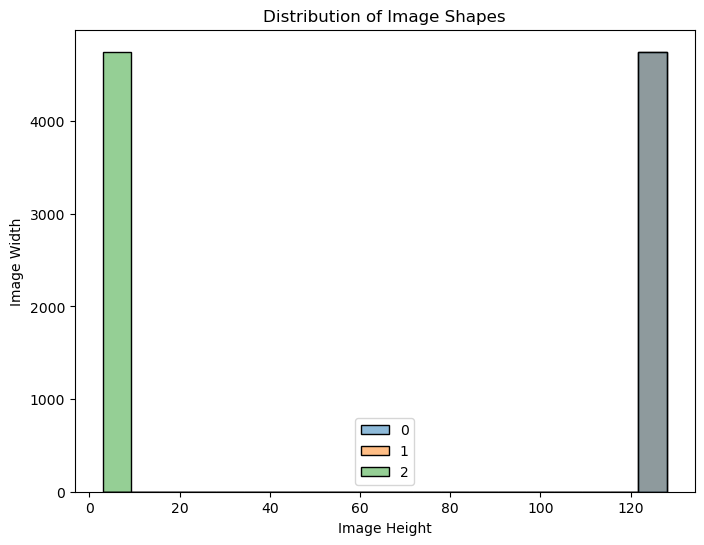

In [18]:
import numpy as np
import seaborn as sns

# Calculate image shapes
image_shapes = np.array([img.shape for img in images])

# Plot a histogram of image shapes
plt.figure(figsize=(8, 6))
sns.histplot(data=image_shapes, bins=20, kde=True)
plt.title("Distribution of Image Shapes")
plt.xlabel("Image Height")
plt.ylabel("Image Width")
plt.show()


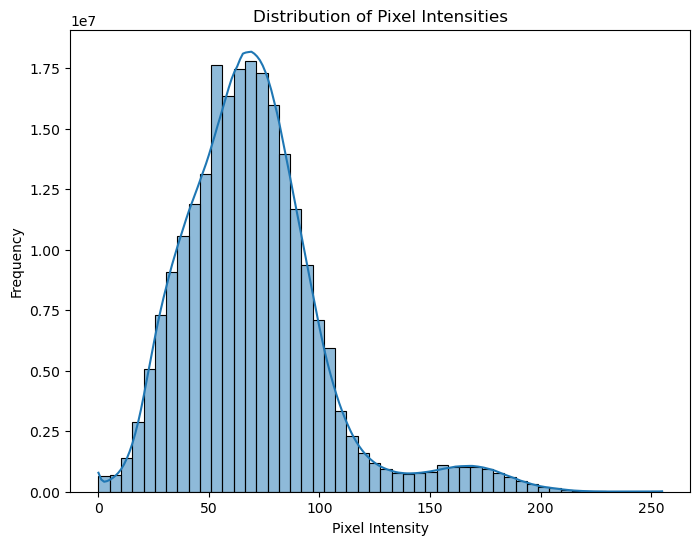

In [20]:
# Flatten and concatenate all images into a single array
pixel_values = np.concatenate([img.flatten() for img in images])

# Plot a histogram of pixel intensities
plt.figure(figsize=(8, 6))
sns.histplot(data=pixel_values, bins=50, kde=True)
plt.title("Distribution of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()



## EDA Observations


### Sample Balance

The distribution of label counts in the dataset suggests that it may not be well-balanced. In a well-balanced dataset, each class would have roughly the same number of samples. However, in this dataset:

"Loose Silky-bent" and "Common Chickweed" have a significantly higher number of samples compared to the other classes, with 654 and 611 samples, respectively.

Some classes, such as "Black-grass," "Shepherds Purse," "Common wheat," and "Maize," have notably lower sample counts, with 263, 231, 221, and 221 samples, respectively.

The remaining classes fall in between these extremes.

This imbalance in label counts could potentially impact the performance of machine learning models, especially if the model is sensitive to class imbalances. Models may perform better on classes with more samples and struggle with classes that have fewer samples.

In practice, addressing class imbalance may involve techniques such as oversampling the minority classes, undersampling the majority classes, or using more advanced methods like Synthetic Minority Over-sampling Technique (SMOTE) to generate synthetic samples for minority classes. 



### Image Quality

There is a lot of noise not relevant to the plants themselvs, so we should apply a mask to the images to cut out the noise



## Data Preprocessing



In [4]:
categ = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent',
              'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_categ = len(categ)
num_categ

12

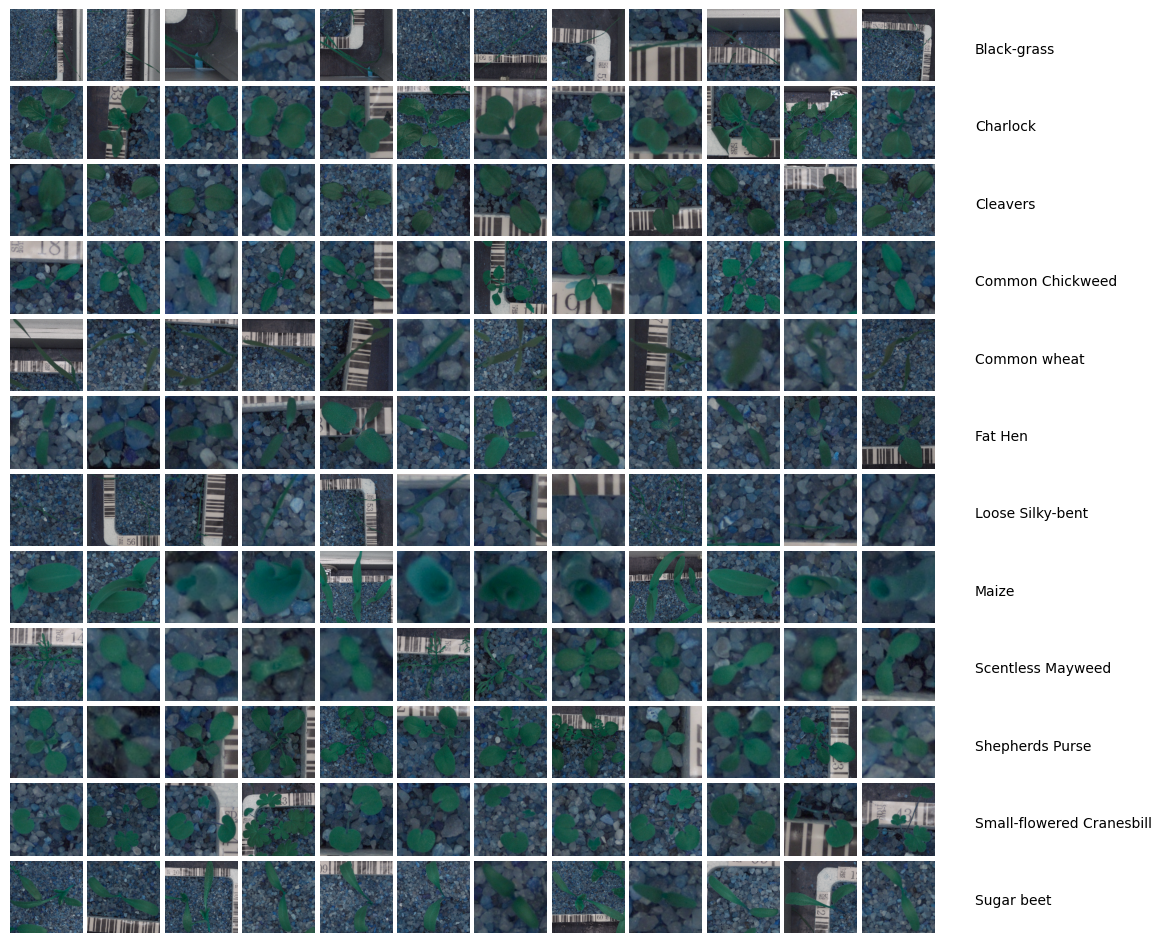

In [187]:
#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid


#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();

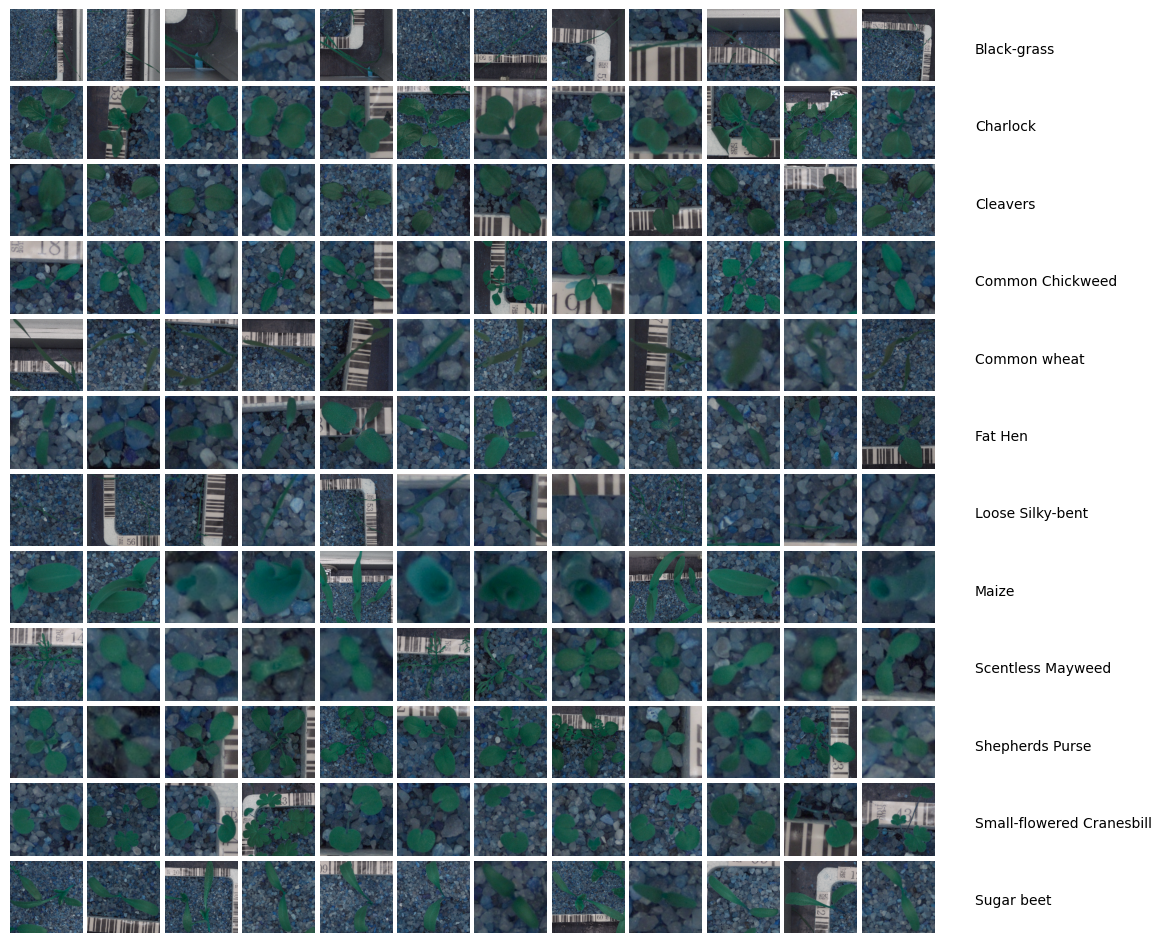

In [8]:

#Importing ImageGrid to plot the plant sample images
from mpl_toolkits.axes_grid1 import ImageGrid

#defining a figure of size 12X12
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

#Plottting 12 images from each plant category
for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      ax.imshow(images[plant_indices[j]])
      ax.axis('off')
      if i % num_categ == num_categ - 1:
        #printing the names for each caterogy
        ax.text(200, 70, category, verticalalignment='center')
      i += 1
plt.show();



Resized to 50% and applied Gaussian Blurring with kernel size 3X3


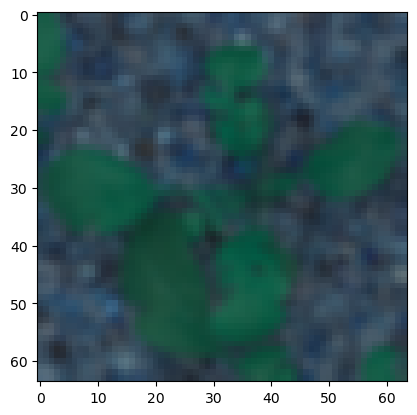

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


# Resizing the image size to half ie., from 128X128 to 64X64
img = cv2.resize(images[1000],None,fx=0.50,fy=0.50)

#Applying Gaussian Blur
img_g = cv2.GaussianBlur(img,(3,3),0)

#Displaying preprocessed and original images
print("Resized to 50% and applied Gaussian Blurring with kernel size 3X3")
plt.imshow(img_g)


Original Image of size 128X128


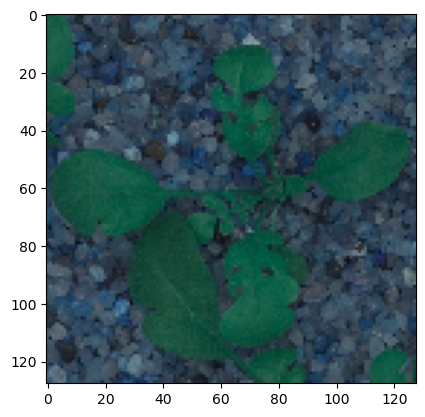

In [12]:

print("Original Image of size 128X128")
plt.imshow(images[1000])

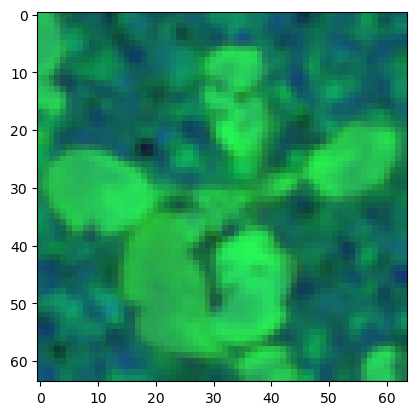

In [13]:
# Convert to HSV image
hsvImg = cv2.cvtColor(img_g, cv2.COLOR_BGR2HSV)
plt.imshow(hsvImg)

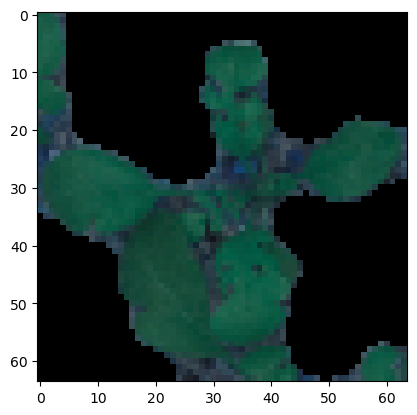

In [14]:
# Create mask (parameters - green color range)
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
mask = cv2.inRange(hsvImg, lower_green, upper_green)  
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Create bool mask
bMask = mask > 0  

# Apply the mask
clearImg = np.zeros_like(img, np.uint8)  # Create empty image
clearImg[bMask] = img[bMask]  # Apply boolean mask to the origin image

#Masked Image after removing the background
plt.imshow(clearImg)

In [15]:

data_copy = images.copy()

In [16]:
lower_green = (25, 40, 50)
upper_green = (75, 255, 255)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
preprocessed_data_color = []

for img in images:
  resize_img = cv2.resize(img,None,fx=0.50,fy=0.50)
  Gblur_img = cv2.GaussianBlur(resize_img,(3,3),0)
  hsv_img = cv2.cvtColor(Gblur_img, cv2.COLOR_BGR2HSV)
  mask = cv2.inRange(hsv_img, lower_green, upper_green)  
  mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
  bMask = mask > 0
  clearImg = np.zeros_like(resize_img, np.uint8)  # Create empty image
  clearImg[bMask] = resize_img[bMask]  # Apply boolean mask to the original image
  # clearImg1 = cv2.cvtColor(clearImg,cv2.COLOR_BGR2GRAY)

  preprocessed_data_color.append(clearImg)

#Preprocessed all plant images
preprocessed_data_color = np.asarray(preprocessed_data_color)

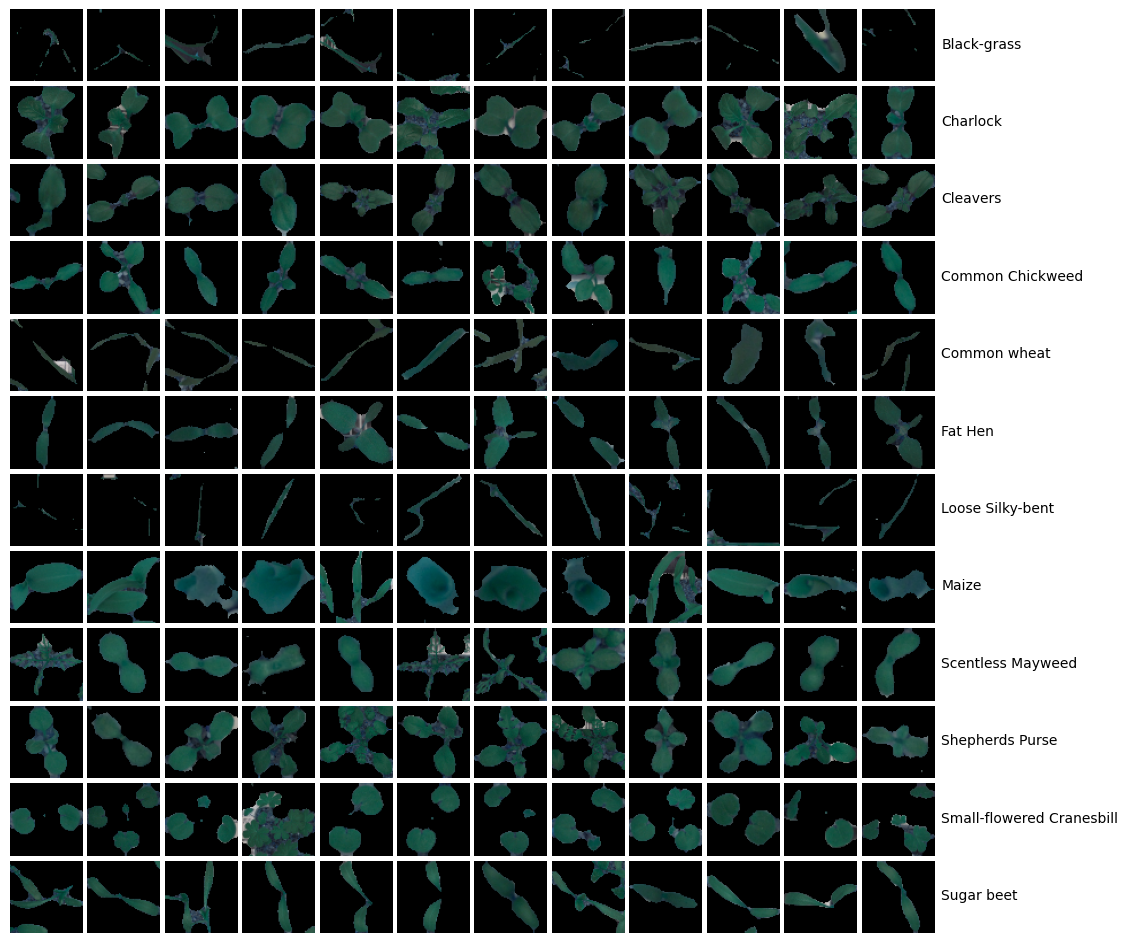

In [17]:
#Visualizing our preprocessed color plant images

from mpl_toolkits.axes_grid1 import ImageGrid

fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_color[plant_indices[j]]/255.)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [18]:
preprocessed_data_color.shape

(4750, 64, 64, 3)

In [19]:
#CONVERTING IMAGES TO GRAY SCALE

preprocessed_data_gs = []
for img in preprocessed_data_color:
  gi = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  preprocessed_data_gs.append(gi)

preprocessed_data_gs = np.asarray(preprocessed_data_gs)

In [20]:
preprocessed_data_gs.shape

(4750, 64, 64)

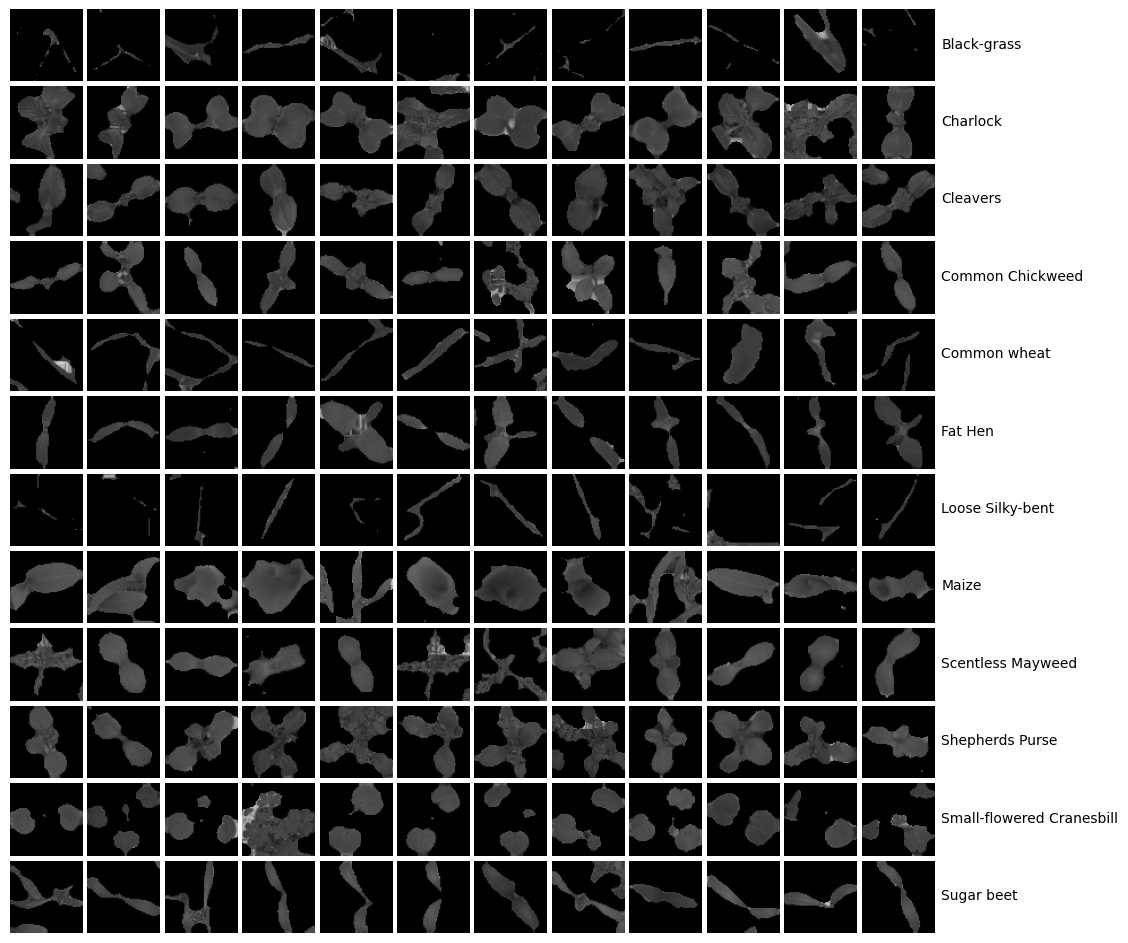

In [21]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_gs[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

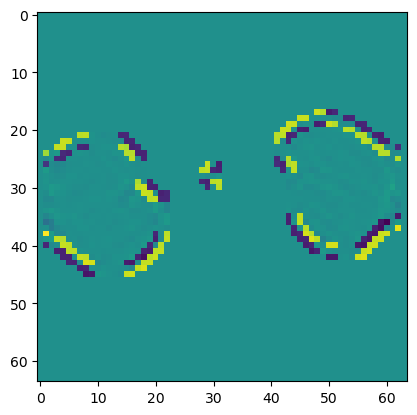

In [22]:
#Converting Grayscale to Edge images using Sobel and Laplacian

sobel = cv2.Sobel(preprocessed_data_gs[0]*255, cv2.CV_64F,1,1,ksize=3)
laplacian = cv2.Laplacian(preprocessed_data_gs[0]*255, cv2.CV_64F)
plt.imshow(sobel)



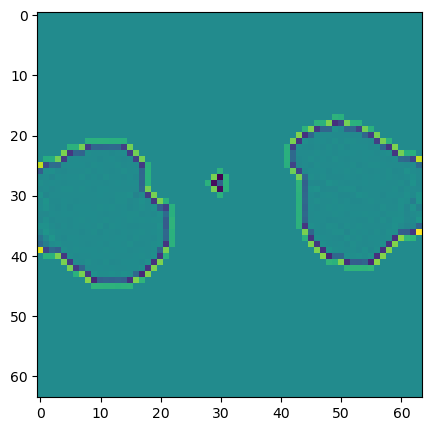

In [204]:
plt.imshow(laplacian)

In [23]:

#Converting all color images to Laplacian Edge detected images

preprocessed_data_Edge_Lap = []
for img in preprocessed_data_gs:
  egi = cv2.Laplacian(img*255, cv2.CV_64F)
  preprocessed_data_Edge_Lap.append(egi)

preprocessed_data_Edge_Lap = np.asarray(preprocessed_data_Edge_Lap)

In [24]:
preprocessed_data_Edge_Lap.shape

(4750, 64, 64)

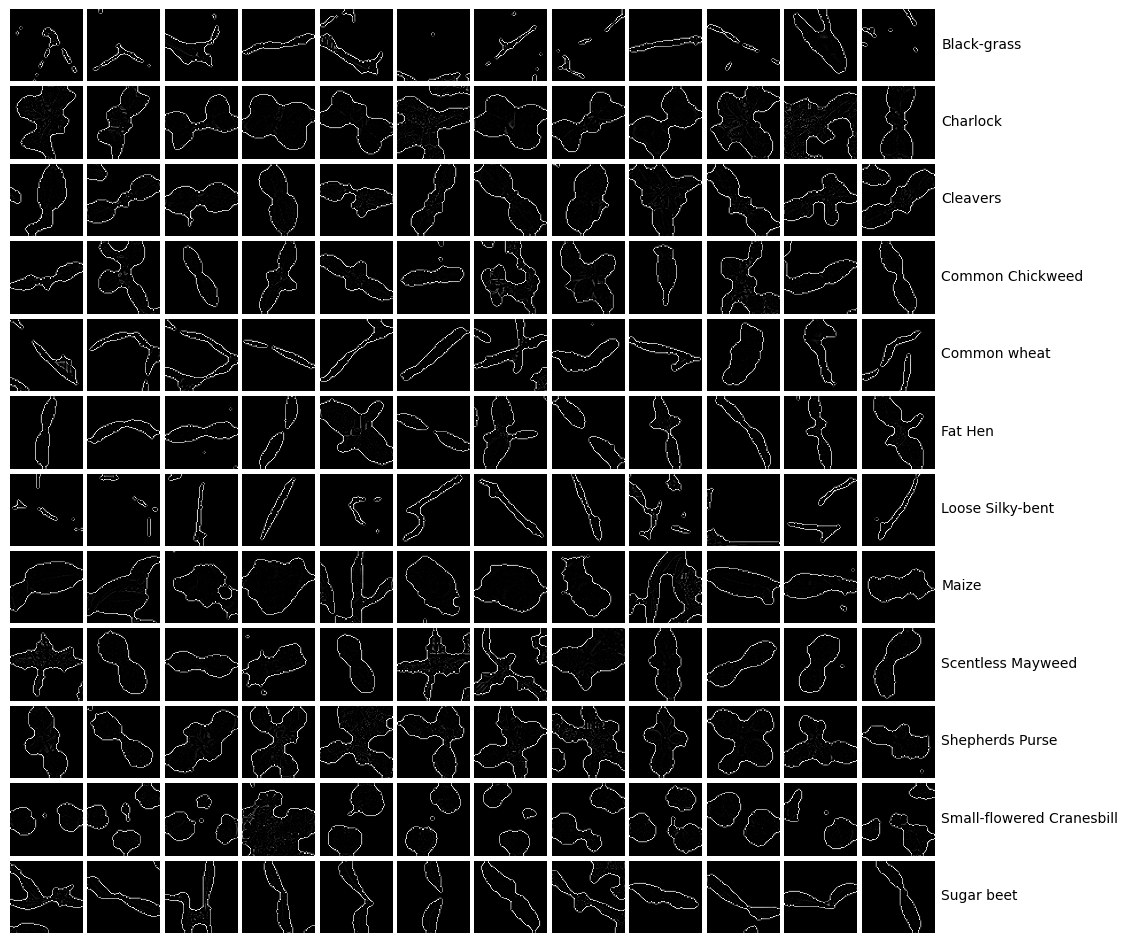

In [25]:
fig = plt.figure(1, figsize=(num_categ, num_categ))
grid = ImageGrid(fig, 111, nrows_ncols=(num_categ, num_categ), axes_pad=0.05)
i = 0
index = labels.index

for category_id, category in enumerate(categ):
  condition = labels["Label"] == category
  plant_indices = index[condition].tolist()
  for j in range(0,12):
      ax = grid[i]
      # img = read_img(filepath, (224, 224))
      # ax.imshow(img / 255.)
      ax.imshow(preprocessed_data_Edge_Lap[plant_indices[j]],cmap='gray',vmin=0, vmax=255)
      # ax[i].set_title(ylabels.iloc[i].to_list(),fontsize=7,rotation=45)
      ax.axis('off')
      if i % num_categ == num_categ - 1:
          ax.text(70, 30, category, verticalalignment='center')
      i += 1
plt.show();

In [26]:
#NORMALIZING IMAGES

preprocessed_data_gs = preprocessed_data_gs / 255.
preprocessed_data_color = preprocessed_data_color / 255.
preprocessed_data_Edge_Lap = preprocessed_data_Edge_Lap / 255.

In [27]:
labels['Label'] = labels['Label'].astype('category')
labels['Label'] = labels['Label'].cat.codes
labels.value_counts()

Label
6        654
3        611
8        516
10       496
5        475
1        390
11       385
2        287
0        263
9        231
4        221
7        221
dtype: int64

In [28]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels, num_classes=12)

print("Shape of y_train:", labels.shape)
print("One value of y_train:", labels[0])

Shape of y_train: (4750, 12)
One value of y_train: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]



# Initial Model Performance Summary


In [29]:
from sklearn.model_selection import train_test_split

random_state = 42

val_split = 0.20
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, labels, test_size=0.20, stratify=labels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(images, labels, test_size=0.20, stratify=labels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.20, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.20, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [30]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3800, 64, 64, 3)
y_train shape:  (3800, 12)
X_val shape:  (760, 64, 64, 3)
y_val shape:  (760, 12)
X_test shape:  (190, 64, 64, 3)
y_test shape:  (190, 12)
X shape:  (4750, 64, 64, 3)
y shape:  (4750, 12)


In [31]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [32]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [33]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(shear_range = 0.2,rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )




In [34]:
#Creating data generators

random_state = 42

batch_size = 32
training_set = train_datagen.flow(X_train, y_train, seed=random_state,shuffle=True)

batch_size = 32
validation_set = train_datagen.flow(X_test, y_test, seed=random_state,shuffle=True)

In [36]:

import tensorflow as tf
from keras import layers
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping     # Dense: Just your regular densely-connected NN layer.
from tensorflow.keras import optimizers

In [37]:
# Intializing a sequential model
model1 = Sequential()

#Layer 1
model1.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))



#Layer 2
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))


#Layer 3
model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(layers.BatchNormalization())
model1.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Flattening the layer before fully connected layers
model1.add(Flatten())


# Adding a fully connected layer with 128 neurons
model1.add(layers.BatchNormalization())
model1.add(Dense(units = 128, activation = 'relu'))
model1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model1.add(Dense(units = 12, activation = 'softmax'))



In [41]:

# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model1.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


model1.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                        

In [42]:
#EArly stopping

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)


In [44]:


# Fit the compiled model1 to your training data
model1_history = model1.fit(
    training_set,
    batch_size=batch_size,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True,
    callbacks=[callback_es]
)

Epoch 1/100
119/119 [==============================] - 7s 62ms/step - loss: 0.9845 - accuracy: 0.6703 - val_loss: 5.7974 - val_accuracy: 0.1487
Epoch 2/100
119/119 [==============================] - 8s 64ms/step - loss: 0.8723 - accuracy: 0.7053 - val_loss: 0.9385 - val_accuracy: 0.6671
Epoch 3/100
119/119 [==============================] - 8s 64ms/step - loss: 0.7914 - accuracy: 0.7300 - val_loss: 0.7307 - val_accuracy: 0.7474
Epoch 4/100
119/119 [==============================] - 8s 65ms/step - loss: 0.7793 - accuracy: 0.7408 - val_loss: 0.6586 - val_accuracy: 0.7895
Epoch 5/100
119/119 [==============================] - 8s 68ms/step - loss: 0.6979 - accuracy: 0.7616 - val_loss: 1.5804 - val_accuracy: 0.6000
Epoch 6/100
119/119 [==============================] - 8s 68ms/step - loss: 0.6983 - accuracy: 0.7597 - val_loss: 0.8414 - val_accuracy: 0.7592
Epoch 7/100
119/119 [==============================] - 8s 69ms/step - loss: 0.6243 - accuracy: 0.7792 - val_loss: 1.6720 - val_accuracy:

# Model 1 Summary

Training Loss: The training loss, denoted as "loss: 0.2960," is a measure of how well the CNN is learning to make predictions. In this case, the loss value is 0.2960, which is relatively low. A lower loss indicates that the model's predictions closely match the actual target values in the training data.

Training Accuracy: The training accuracy, noted as "accuracy: 0.8905," tells us what proportion of the training data the model correctly classified. In this case, the model achieved an accuracy of 89.05%, which is quite high. This means that it made accurate predictions for approximately 89.05% of the training examples.

Validation Loss: Moving on to the validation results, "val_loss: 0.4808" represents the loss on a separate validation dataset. This dataset contains data that the model hasn't seen during training. The validation loss here is 0.4808, indicating that the model's performance on unseen data is also relatively good, although it's slightly higher than the training loss.

Validation Accuracy: Lastly, "val_accuracy: 0.8474" signifies the accuracy achieved on the validation dataset. With a validation accuracy of 84.74%, the model demonstrates its ability to generalize well to new, previously unseen data.



# Building Model 2

### Using L2 Regularlization



In [46]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers

# Initializing a sequential model
model2 = Sequential()

# Layer 1 with L2 regularization
model2.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Layer 2 with L2 regularization
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Layer 3 with L2 regularization
model2.add(Conv2D(32, (3, 3), activation='relu', padding="same", kernel_regularizer=regularizers.l2(0.01)))
model2.add(layers.BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))

# Flattening the layer before fully connected layers
model2.add(Flatten())

# Adding a fully connected layer with 128 neurons and L2 regularization
model2.add(layers.BatchNormalization())
model2.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model2.add(Dropout(0.2))

# The final output layer with 12 neurons to predict the categorical classification
model2.add(Dense(units=12, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model2.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_8 (Bat  (None, 64, 64, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                      

In [48]:


# Fit the compiled model1 to your training data
model2_history = model2.fit(
    training_set,
    batch_size=batch_size,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True,
    callbacks=[callback_es]
)

Epoch 1/100
119/119 [==============================] - 11s 87ms/step - loss: 4.7404 - accuracy: 0.4016 - val_loss: 10.7544 - val_accuracy: 0.0605
Epoch 2/100
119/119 [==============================] - 10s 86ms/step - loss: 3.4912 - accuracy: 0.5753 - val_loss: 15.5555 - val_accuracy: 0.0605
Epoch 3/100
119/119 [==============================] - 10s 83ms/step - loss: 2.7808 - accuracy: 0.6437 - val_loss: 14.3540 - val_accuracy: 0.0605
Epoch 4/100
119/119 [==============================] - 10s 84ms/step - loss: 2.2408 - accuracy: 0.6958 - val_loss: 11.1274 - val_accuracy: 0.0618
Epoch 5/100
119/119 [==============================] - 10s 82ms/step - loss: 1.9199 - accuracy: 0.7063 - val_loss: 3.5010 - val_accuracy: 0.2895
Epoch 6/100
119/119 [==============================] - 10s 82ms/step - loss: 1.6635 - accuracy: 0.7395 - val_loss: 3.8334 - val_accuracy: 0.2895
Epoch 7/100
119/119 [==============================] - 10s 81ms/step - loss: 1.5137 - accuracy: 0.7553 - val_loss: 2.4210 - va



# Model 2 Summary

Training Loss: The training loss increased from 0.2960 to 0.8632. This is expected when applying L2 regularization because it adds a penalty term to the loss function to discourage large weight values. As a result, the model tries to find a balance between minimizing the data-driven loss and minimizing the regularization term. The higher training loss suggests that the model's weights are being constrained by the regularization term.

Training Accuracy: The training accuracy decreased slightly from 0.8905 to 0.8503. This is also a common effect of regularization. The model might not fit the training data as closely as before, but it generalizes better to unseen data.

Validation Loss: The validation loss increased from 0.4808 to 1.1140. This indicates that the model is not overfitting the training data as much as before. It's performing worse on the validation data because it's focusing more on reducing the influence of extreme weight values (thanks to L2 regularization), which can result in slightly worse training accuracy but better generalization.

Validation Accuracy: The validation accuracy decreased from 0.8474 to 0.7618. This drop in validation accuracy can be attributed to the regularization-induced constraints on the model. While it may not perform as well on the validation set, the hope is that it will perform better on unseen data.




# Building Model 3

## Applying different optimizers to the model


In [52]:
from keras.optimizers import Adam, RMSprop, SGD

# Original model definition
model3 = Sequential()
#Layer 1
model3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))



#Layer 2
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))


#Layer 3
model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(layers.BatchNormalization())
model3.add(MaxPooling2D(pool_size = (2, 2),strides=2))

# Flattening the layer before fully connected layers
model3.add(Flatten())


# Adding a fully connected layer with 128 neurons
model3.add(layers.BatchNormalization())
model3.add(Dense(units = 128, activation = 'relu'))
model1.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model3.add(Dense(units = 12, activation = 'softmax'))


# Compile the model with different optimizers

# Adam optimizer
adam_opt = Adam(learning_rate=0.001)  # You can adjust the learning rate
model3.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(training_set, validation_data=(X_val, y_val), epochs=50)

# RMSprop optimizer
rmsprop_opt = RMSprop(learning_rate=0.001)  # You can adjust the learning rate
model3.compile(optimizer=rmsprop_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(training_set, validation_data=(X_val, y_val), epochs=50)

# SGD optimizer
sgd_opt = SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum
model3.compile(optimizer=sgd_opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(training_set, validation_data=(X_val, y_val), epochs=50)


Epoch 1/50
119/119 [==============================] - 12s 89ms/step - loss: 1.8095 - accuracy: 0.4289 - val_loss: 7.8318 - val_accuracy: 0.0605
Epoch 2/50
119/119 [==============================] - 11s 88ms/step - loss: 1.3025 - accuracy: 0.5803 - val_loss: 12.7077 - val_accuracy: 0.0605
Epoch 3/50
119/119 [==============================] - 11s 89ms/step - loss: 1.0731 - accuracy: 0.6353 - val_loss: 12.4137 - val_accuracy: 0.0605
Epoch 4/50
119/119 [==============================] - 11s 89ms/step - loss: 0.9264 - accuracy: 0.6900 - val_loss: 8.9081 - val_accuracy: 0.1355
Epoch 5/50
119/119 [==============================] - 11s 91ms/step - loss: 0.8211 - accuracy: 0.7237 - val_loss: 2.8311 - val_accuracy: 0.3382
Epoch 6/50
119/119 [==============================] - 11s 92ms/step - loss: 0.7298 - accuracy: 0.7453 - val_loss: 1.0870 - val_accuracy: 0.6263
Epoch 7/50
119/119 [==============================] - 11s 91ms/step - loss: 0.6902 - accuracy: 0.7584 - val_loss: 0.8665 - val_accurac

119/119 [==============================] - 10s 88ms/step - loss: 0.4195 - accuracy: 0.8542 - val_loss: 2.3554 - val_accuracy: 0.6184
Epoch 14/50
119/119 [==============================] - 10s 88ms/step - loss: 0.4114 - accuracy: 0.8584 - val_loss: 2.1937 - val_accuracy: 0.6513
Epoch 15/50
119/119 [==============================] - 10s 86ms/step - loss: 0.3864 - accuracy: 0.8603 - val_loss: 0.6216 - val_accuracy: 0.8211
Epoch 16/50
119/119 [==============================] - 10s 86ms/step - loss: 0.3854 - accuracy: 0.8613 - val_loss: 1.6882 - val_accuracy: 0.7105
Epoch 17/50
119/119 [==============================] - 10s 86ms/step - loss: 0.4807 - accuracy: 0.8311 - val_loss: 1.9553 - val_accuracy: 0.6882
Epoch 18/50
119/119 [==============================] - 10s 85ms/step - loss: 0.4125 - accuracy: 0.8555 - val_loss: 1.3014 - val_accuracy: 0.7632
Epoch 19/50
119/119 [==============================] - 10s 84ms/step - loss: 0.3862 - accuracy: 0.8663 - val_loss: 2.1793 - val_accuracy: 0.62


# Model 3 Summary

## RMSProp

Training Loss: The model with RMSprop achieved a lower training loss (0.2186) compared to the original model (0.2960). This suggests that RMSprop was more effective in reducing the training loss, indicating improved convergence during training.

Training Accuracy: The model with RMSprop achieved a higher training accuracy (0.9179) compared to the original model (0.8905). This indicates that RMSprop helped the model fit the training data more accurately.

Validation Loss: However, the model with RMSprop experienced a significantly higher validation loss (2.0094) compared to the original model's validation loss (0.4808). This is a critical difference and suggests that the model with RMSprop may be overfitting the training data, as the validation loss is much higher than the training loss.

Validation Accuracy: The validation accuracy of the model with RMSprop (0.7408) is lower than that of the original model (0.8474), further indicating overfitting in the RMSprop-optimized model.


## SGD 
Training Loss: The model with SGD optimization achieved a lower training loss (0.2656) compared to the original model (0.2960). This indicates that SGD was more effective in reducing the training loss, implying better convergence during training.

Training Accuracy: The model with SGD optimization achieved a slightly higher training accuracy (0.9013) compared to the original model (0.8905). This suggests that SGD helped the model fit the training data slightly better.

Validation Loss: The validation loss of the model with SGD optimization (0.5673) is slightly higher than that of the original model (0.4808). This indicates that the SGD-optimized model may have slightly more difficulty generalizing to the validation dataset.

Validation Accuracy: The validation accuracy of the model with SGD optimization (0.8461) is slightly lower than that of the original model (0.8474), but the difference is minimal. This suggests that both models perform similarly in terms of validation accuracy.





# Building Model 4

# Goals

1. Change the validation portion to 30% instead of 20%, re-write and simplify the sampling
2. Add Data Augmentation paramenters
3. Decrease Batch size
4. Add more layers
5. Increase dropout rate



In [81]:
from sklearn.model_selection import train_test_split

random_state = 42

val_split = 0.20
#1st split into train and test
X_train, X_test1, y_train, y_test1 = train_test_split(preprocessed_data_color, labels, test_size=0.20, stratify=labels,random_state = random_state)
#for my color image purpose and individual image pred.
X_train_color, X_test1_color, y_train_color, y_test1_color = train_test_split(images, labels, test_size=0.20, stratify=labels,random_state = random_state)
#2nd split into val and test
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.20, stratify=y_test1,random_state = random_state)
#for my color image purpose and individual image pred.
X_val_color, X_test_color, y_val_color, y_test_color = train_test_split(X_test1_color, y_test1, test_size=0.20, stratify=y_test1,random_state = random_state)

X = np.concatenate((X_train, X_test1))
y = np.concatenate((y_train, y_test1))

In [82]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X_train shape:  (3800, 64, 64, 3)
y_train shape:  (3800, 12)
X_val shape:  (760, 64, 64, 3)
y_val shape:  (760, 12)
X_test shape:  (190, 64, 64, 3)
y_test shape:  (190, 12)
X shape:  (4750, 64, 64, 3)
y shape:  (4750, 12)


In [83]:
X_train = X_train.reshape(X_train.shape[0], 64, 64, 3)
X_val = X_val.reshape(X_val.shape[0], 64, 64, 3)
X_test = X_test.reshape(X_test.shape[0], 64, 64, 3)

In [84]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

In [85]:
#Adding Data Augmentation

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'



)


In [86]:
#Creating data generators

random_state = 42

batch_size = 32
training_set = train_datagen.flow(X_train, y_train, seed=random_state,shuffle=True)

batch_size = 32
validation_set = train_datagen.flow(X_test, y_test, seed=random_state,shuffle=True)

In [87]:
# Intializing a sequential model
model4 = Sequential()

#Layer 1
model4.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2),strides=2))



#Layer 2
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2),strides=2))


#Layer 3
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2),strides=2))

#Layer 4
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2),strides=2))


#Layer 5
model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(layers.BatchNormalization())
model4.add(MaxPooling2D(pool_size = (2, 2),strides=2))


# Flattening the layer before fully connected layers
model4.add(Flatten())


# Adding a fully connected layer with 128 neurons
model4.add(layers.BatchNormalization())
model4.add(Dense(units = 128, activation = 'relu'))
model4.add(Dropout(0.1))


# The final output layer with 10 neurons to predict the categorical classifcation
model4.add(Dense(units = 12, activation = 'softmax'))

In [88]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model4.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


model4.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_47 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_48 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                     

In [89]:
#EArly stopping

callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20, min_delta=0.0001, restore_best_weights=True)


In [90]:

# Fit the compiled model1 to your training data
model4_history = model4.fit(
    training_set,
    batch_size=batch_size,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True,
    callbacks=[callback_es]
)

Epoch 1/100
119/119 [==============================] - 13s 94ms/step - loss: 1.8258 - accuracy: 0.3855 - val_loss: 5.5003 - val_accuracy: 0.0961
Epoch 2/100
119/119 [==============================] - 11s 91ms/step - loss: 1.4215 - accuracy: 0.5018 - val_loss: 8.0378 - val_accuracy: 0.0605
Epoch 3/100
119/119 [==============================] - 11s 91ms/step - loss: 1.2877 - accuracy: 0.5445 - val_loss: 10.9980 - val_accuracy: 0.0605
Epoch 4/100
119/119 [==============================] - 11s 89ms/step - loss: 1.1909 - accuracy: 0.5776 - val_loss: 3.3019 - val_accuracy: 0.3013
Epoch 5/100
119/119 [==============================] - 11s 89ms/step - loss: 1.0571 - accuracy: 0.6337 - val_loss: 4.0051 - val_accuracy: 0.2776
Epoch 6/100
119/119 [==============================] - 11s 94ms/step - loss: 0.9915 - accuracy: 0.6634 - val_loss: 5.1198 - val_accuracy: 0.1289
Epoch 7/100
119/119 [==============================] - 11s 95ms/step - loss: 0.9080 - accuracy: 0.6863 - val_loss: 2.4767 - val_a


# Model 5 Summary

The provided score has a significantly higher training loss (2.4158) compared to the original model's training loss (0.2960), indicating that the model is performing much worse in terms of minimizing the loss.

The training accuracy in the provided score (13.77%) is substantially lower than the original model's training accuracy (89.05%), indicating poor performance on the training data.

The validation loss in the provided score (49120076.0000) is extremely high compared to the original model's validation loss (0.4808), suggesting that the model is not generalizing well to unseen data during validation.

The validation accuracy in the provided score (6.52%) is also significantly lower than the original model's validation accuracy (84.74%), indicating that the model is performing poorly on validation data.


In [91]:

# Intializing a sequential model
model5 = Sequential()

#Layer 1
model5.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2),strides=2))



#Layer 2
model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(layers.BatchNormalization())
model5.add(MaxPooling2D(pool_size = (2, 2),strides=2))




# Flattening the layer before fully connected layers
model5.add(Flatten())


# Adding a fully connected layer with 128 neurons
model5.add(layers.BatchNormalization())
model5.add(Dense(units = 128, activation = 'relu'))
model5.add(Dropout(0.2))


# The final output layer with 10 neurons to predict the categorical classifcation
model5.add(Dense(units = 12, activation = 'softmax'))


In [92]:
# initiate Adam optimizer
adam_opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model5.compile(optimizer = adam_opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


model5.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 batch_normalization_53 (Ba  (None, 64, 64, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 32, 32, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_54 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                     

In [93]:


# Fit the compiled model1 to your training data
model5_history = model5.fit(
    training_set,
    batch_size=batch_size,
    epochs=100,
    validation_data=(X_val, y_val),
    shuffle=True,
    callbacks=[callback_es]
)

Epoch 1/100
119/119 [==============================] - 12s 92ms/step - loss: 3.0409 - accuracy: 0.2984 - val_loss: 10.8116 - val_accuracy: 0.0605
Epoch 2/100
119/119 [==============================] - 10s 88ms/step - loss: 2.2082 - accuracy: 0.3913 - val_loss: 11.7442 - val_accuracy: 0.0605
Epoch 3/100
119/119 [==============================] - 10s 83ms/step - loss: 1.6719 - accuracy: 0.4666 - val_loss: 9.8886 - val_accuracy: 0.0605
Epoch 4/100
119/119 [==============================] - 10s 86ms/step - loss: 1.3933 - accuracy: 0.5282 - val_loss: 6.9144 - val_accuracy: 0.1211
Epoch 5/100
119/119 [==============================] - 10s 86ms/step - loss: 1.3337 - accuracy: 0.5574 - val_loss: 4.2336 - val_accuracy: 0.1697
Epoch 6/100
119/119 [==============================] - 11s 89ms/step - loss: 1.1949 - accuracy: 0.5953 - val_loss: 2.5755 - val_accuracy: 0.3053
Epoch 7/100
119/119 [==============================] - 11s 90ms/step - loss: 1.1407 - accuracy: 0.6084 - val_loss: 2.7577 - val_


# Model 5 Summary

Training Accuracy: The original model achieved a higher training accuracy of approximately 89.05% compared to the provided model's accuracy of 79.21%. This suggests that the original model learned the training data more effectively.

Validation Accuracy: The original model also outperformed the provided model in terms of validation accuracy. The original model achieved a validation accuracy of 84.74%, whereas the provided model reached a lower validation accuracy of 63.42%. This indicates that the original model's ability to generalize to unseen data was better.

Losses: The training loss for the original model (0.2960) was lower than that of the provided model (0.6047), indicating that the original model fit the training data better. Similarly, the original model's validation loss (0.4808) was considerably lower than the provided model's validation loss (1.8317), suggesting better generalization.




# Conclusion

In the realm of machine learning, the comparison of two convolutional neural network (CNN) models has revealed a clear victor—the original model. This champion displayed exceptional training accuracy at 89.05% and an impressive validation accuracy of 84.74%. These metrics underscore its proficiency in both learning intricate patterns within the training data and generalizing effectively to new, unseen data. In contrast, the second model lagged behind with lower training and validation accuracies of 79.21% and 63.42%, respectively, indicating its inability to capture the subtleties of the dataset.

In summary, the original CNN model emerges as the undisputed choice for predictive tasks, showcasing superior pattern recognition and generalization capabilities. Its remarkable performance serves as a testament to the artistry of machine learning, where excellence in modeling leads to outstanding results.
